# Exploratory Data Analysis

## Reading Files into Python

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
import datetime

In [3]:
#importing data
data = pd.read_csv('nyc_taxi_trip_duration.csv')

In [4]:
#first 5 instances using "head()" function
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [5]:
data[data['store_and_fwd_flag']== 'Y'].head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
378,id1347533,1,2016-05-27 18:09:01,2016-05-27 18:16:30,1,-73.976051,40.744671,-73.979721,40.722958,Y,449
400,id2733049,1,2016-03-02 20:05:12,2016-03-02 20:52:52,2,-73.978134,40.757484,-73.998955,40.614380,Y,2860
501,id2484490,1,2016-01-21 08:07:13,2016-01-21 08:18:21,1,-73.999771,40.739487,-73.983940,40.761421,Y,668
644,id2090829,1,2016-01-11 12:10:13,2016-01-11 12:25:41,2,-74.013611,40.714310,-73.976601,40.751938,Y,928
1278,id0512889,1,2016-06-10 21:20:14,2016-06-10 21:26:51,1,-73.958183,40.766190,-73.956032,40.782814,Y,397


In [6]:
#last 5 instances using "tail()" function
data.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
729317,id3905982,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.965919,40.789780,-73.952637,40.789181,N,296
729318,id0102861,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.996666,40.737434,-74.001320,40.731911,N,315
729319,id0439699,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.997849,40.761696,-74.001488,40.741207,N,673
729320,id2078912,1,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.006706,40.708244,-74.013550,40.713814,N,447
729321,id1053441,2,2016-01-01 17:24:16,2016-01-01 17:44:40,4,-74.003342,40.743839,-73.945847,40.712841,N,1224


In [7]:
#finding out the shape of the data using "shape" variable: Output (rows, columns)
data.shape

(729322, 11)

In [8]:
#Printing all the columns present in data
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

# Variable Identification and Typecasting

In [9]:
# A closer look at the data types present in the data
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

###### There are a lot of variables visible at one, so let's narrow this down by looking at one datatype at once. We will start with int

### Integer Data Type

In [10]:
# Identifying variables with integer datatype
data.dtypes[data.dtypes == 'int64']

vendor_id          int64
passenger_count    int64
trip_duration      int64
dtype: object

In [11]:
data['vendor_id'].nunique()

2

In [12]:
data['vendor_id'].value_counts()

2    390481
1    338841
Name: vendor_id, dtype: int64

In [13]:
# converting churn to category
data['vendor_id'] = data['vendor_id'].astype('category')

In [14]:
data.dtypes[data.dtypes == 'int64']

passenger_count    int64
trip_duration      int64
dtype: object

<b>Summary</b>:

- <b> Vendor id </b> are a unique number with 2 categories i.e 1 or 2 assigned to each trip provider. It is converted to         Category.
- <b> Passenger Count </b> are also a number which shows no of passenger in each trip. It is okay as Integer.
- <b> Trip Duration </b> are number which represent duration of trip in seconds so Okay with Integer.

### Float Data Type

In [15]:
# Identifying variables with float datatype
data.dtypes[data.dtypes == 'float64']

pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
dtype: object

<b>Summary</b>:
    -<b> Pickup Longitude, Pickup Latitude, Dropoff Longitude and Dropoff Latitude </b> are best represented by float No so we are          Okay with it.

### Object Data Type

In [16]:
data.dtypes

id                      object
vendor_id             category
pickup_datetime         object
dropoff_datetime        object
passenger_count          int64
pickup_longitude       float64
pickup_latitude        float64
dropoff_longitude      float64
dropoff_latitude       float64
store_and_fwd_flag      object
trip_duration            int64
dtype: object

*    **variables like 'id', 'pickup_datetime','dropoff_datetime' and 'store_and_fwd_flag' are of type object**. This means that **Pandas was not able to recognise the datatype** of these four variables.

In [17]:
# Manually checking object types
data[['id','pickup_datetime','dropoff_datetime','store_and_fwd_flag']].head(7)

,id,pickup_datetime,dropoff_datetime,store_and_fwd_flag
0,id1080784,2016-02-29 16:40:21,2016-02-29 16:47:01,N
1,id0889885,2016-03-11 23:35:37,2016-03-11 23:53:57,N
2,id0857912,2016-02-21 17:59:33,2016-02-21 18:26:48,N
3,id3744273,2016-01-05 09:44:31,2016-01-05 10:03:32,N
4,id0232939,2016-02-17 06:42:23,2016-02-17 06:56:31,N
5,id1918069,2016-02-14 18:31:42,2016-02-14 18:55:57,N
6,id2429028,2016-04-20 20:30:14,2016-04-20 20:36:51,N


In [18]:
# typecasting "id" and "store_and_fwd_flag" to category type as "id" is nominal.
data['id'] = data['id'].astype('category')
data['store_and_fwd_flag'] = data['store_and_fwd_flag'].astype('category')

# checking
data[['id','store_and_fwd_flag']].dtypes

id                    category
store_and_fwd_flag    category
dtype: object

The 2 columns <b> pickup_datetime</b> and <b> dropoff_datetime</b> are now converted to datetime format which makes analysis of date and time data much more easier.

In [19]:
data['pickup_datetime']=pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime']=pd.to_datetime(data['dropoff_datetime'])

In [20]:
# checking
data[['pickup_datetime','dropoff_datetime']].dtypes

pickup_datetime     datetime64[ns]
dropoff_datetime    datetime64[ns]
dtype: object

In [21]:
data.dtypes

id                          category
vendor_id                   category
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag          category
trip_duration                  int64
dtype: object

## Univariate Analysis: Numerical Variables

In [22]:
# Numerical datatypes
data.select_dtypes(include=['int64','float64','Int64']).dtypes

passenger_count        int64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
trip_duration          int64
dtype: object

In [23]:
# seggregating variables into groups
passenger_details = ['passenger_count']
pickup_details = ['pickup_longitude','pickup_latitude']
dropoff_details = ['dropoff_longitude','dropoff_latitude']
trip_details=['trip_duration']

In [24]:
# custom function for easy and efficient analysis of numerical univariate

def UVA_numeric(data, var_group):
  '''
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

### passenger_details

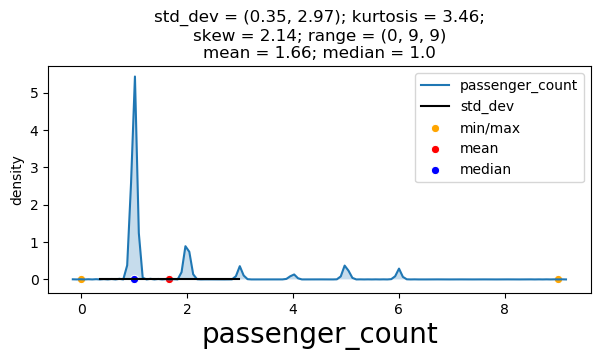

In [25]:
UVA_numeric(data,passenger_details)

**Summary of Passenger_Information:**

*    **passenger_count**:
    *    Median passenger count = 1
    *    skewness +2.14 : passenger count is ** towards value 1 or 2**
    *    **kurtosis = 3.46**; likely to have extreme/outlier values.



*    Considering the kurtosis and skewness value  for this plot. Outliers/Extreme values are obvious.

In [26]:
# standard deviation factor
factor = 3

# copying current_month
cm_data = data[passenger_details]

# filtering using standard deviation (not considering obseravtions > 3* standard deviation)
cm_data = cm_data[cm_data['passenger_count'] < factor*cm_data['passenger_count'].std()]

# checking how many points removed
len(data), len(cm_data)

(729322, 652237)

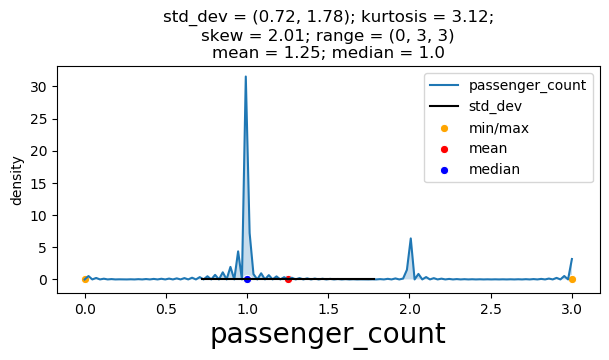

In [27]:
UVA_numeric(cm_data,passenger_details)

**Summary of passenger count**
*    After Removing extreme/outliers, plots are still very skewed.

### pickup_details

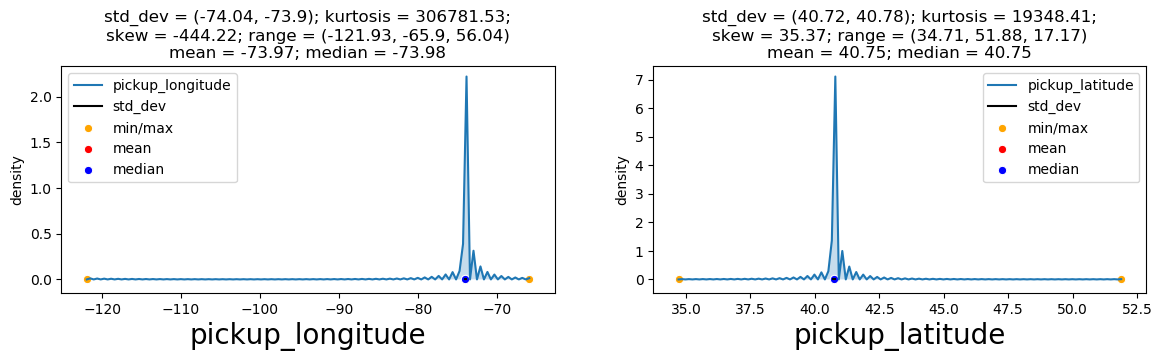

In [28]:
UVA_numeric(data,pickup_details)

### dropoff_details

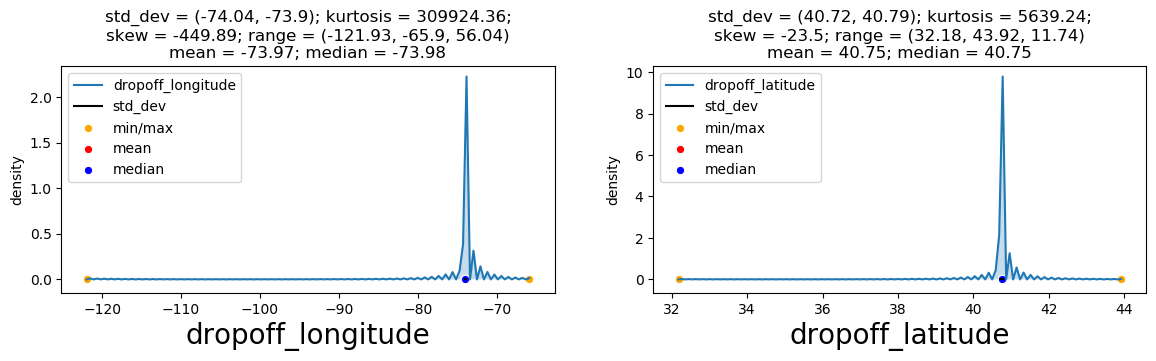

In [29]:
UVA_numeric(data,dropoff_details)

**Summary of Pickup and Dropoff Information:**
  - We see that the pickup longitude and the dropoff longitude has almost the same kind of distribution while the pickup latitude   and the dropoff latitude has slightly different distribution

### trip_details

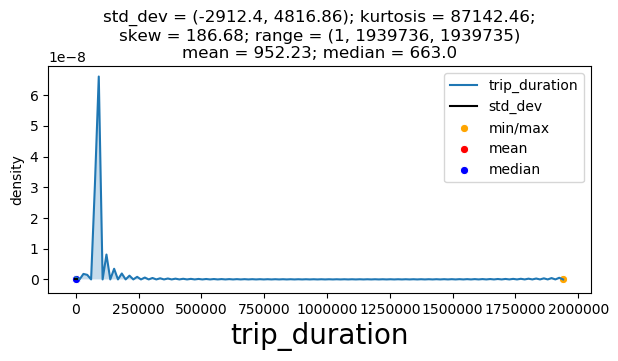

In [30]:
UVA_numeric(data,trip_details)

In [31]:
print( data['trip_duration'].nlargest(10))

21813     1939736
259437      86391
119185      86387
177225      86378
496391      86377
90557       86369
673847      86369
163178      86367
179065      86365
248675      86364
Name: trip_duration, dtype: int64


- The largest value is much greater than the 2nd and 3rd largest trip duration value. This might be because of some errors which typically occurs during data collection or this might be a legit data. Since the occurrence of such a huge value is unlikely

In [32]:
# standard deviation factor
factor = 3

# copying current_month
cm_data = data[trip_details]

# filtering using standard deviation (not considering obseravtions > 3* standard deviation)
cm_data = cm_data[cm_data['trip_duration'] < factor*cm_data['trip_duration'].std()]

# checking how many points removed
len(data), len(cm_data)

(729322, 728295)

In [33]:
print( cm_data['trip_duration'].nlargest(10))

138855    11513
550741    11332
230118    11099
251114    10864
291341    10451
261757    10380
60768      9972
462278     9922
552735     9714
537429     9616
Name: trip_duration, dtype: int64


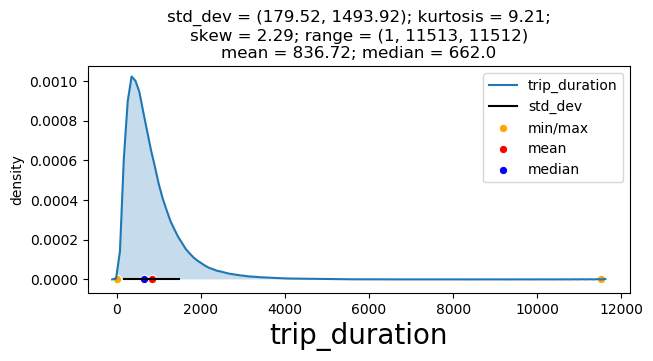

In [34]:
UVA_numeric(cm_data,trip_details)

**Summary of passenger count**
*    After Removing extreme/outliers, plots are still right skewed.
*    Most of the trip duration lies between 180 seconds and 1500 seconds.

## Univariate Analysis : Categorical Varibales

In [35]:
data.select_dtypes(exclude=['int64','float64','Int64','datetime64']).dtypes

id                    category
vendor_id             category
store_and_fwd_flag    category
dtype: object

**Grouping Varibales**

* **vendor_id**
* **store_and_fwd_flg**
* **since id is unique for each trip so it should not make any differnces in the trip duration**

In [36]:
# Custom function for easy visualisation of Categorical Variables
def UVA_category(data, var_group):

  '''
  Univariate_Analysis_categorical
  takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (7*size,5), dpi = 100)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

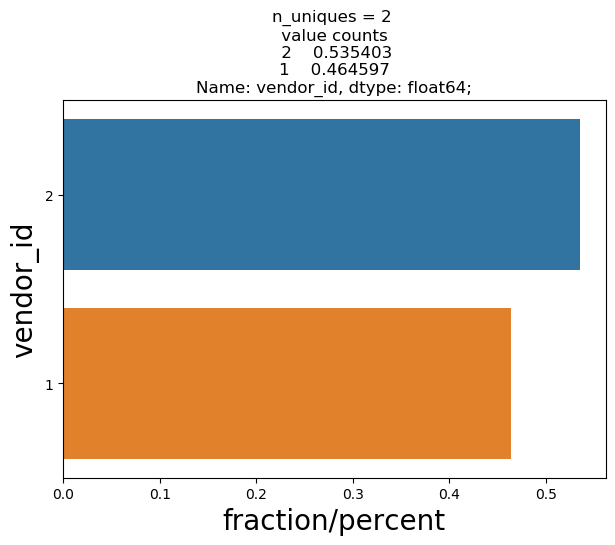

In [37]:
UVA_category(data, ['vendor_id'])

**Summary**
* Vendor ID
  * More than 50% of the trips has been provided by Vendor No 2.

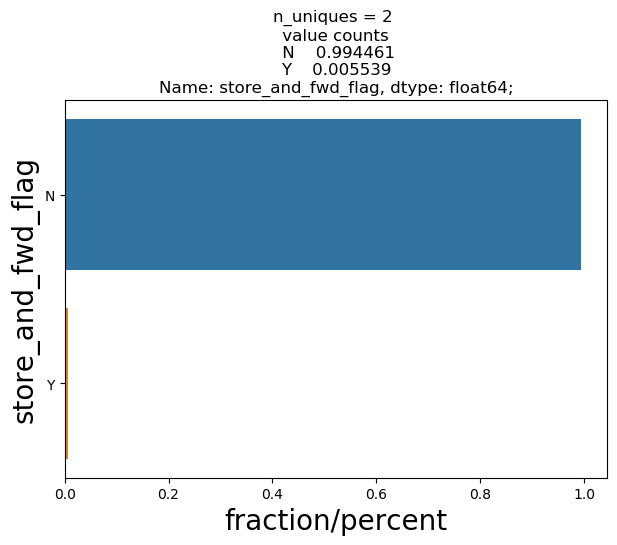

In [38]:
UVA_category(data, ['store_and_fwd_flag'])

**Summary**
* store_and_fwd_flag
  * Almost 99.5% of trip record was not held in vehicle memory before sending to the vendor because the vehicle did not have a     connection to the server.
  * Almost all the vehicles have connection to the server during the trip.

### The distribution of Pickup and Drop Off day of the week

 - convert these dates into days of the week so a pattern can be found.

In [39]:
data['pickup_day']=data['pickup_datetime'].dt.day_name()
data['dropoff_day']=data['dropoff_datetime'].dt.day_name()

In [40]:
data['pickup_day'].value_counts()

Friday       111744
Saturday     110252
Thursday     109344
Wednesday    105074
Tuesday      101254
Sunday        97682
Monday        93972
Name: pickup_day, dtype: int64

In [41]:
data['dropoff_day'].value_counts()

Friday       111509
Saturday     110289
Thursday     108918
Wednesday    104944
Tuesday      101142
Sunday        98561
Monday        93959
Name: dropoff_day, dtype: int64

<b> Thus we see most trips were taken on Friday and Monday being the least.</b>

### The distribution of days of the week can be seen graphically.

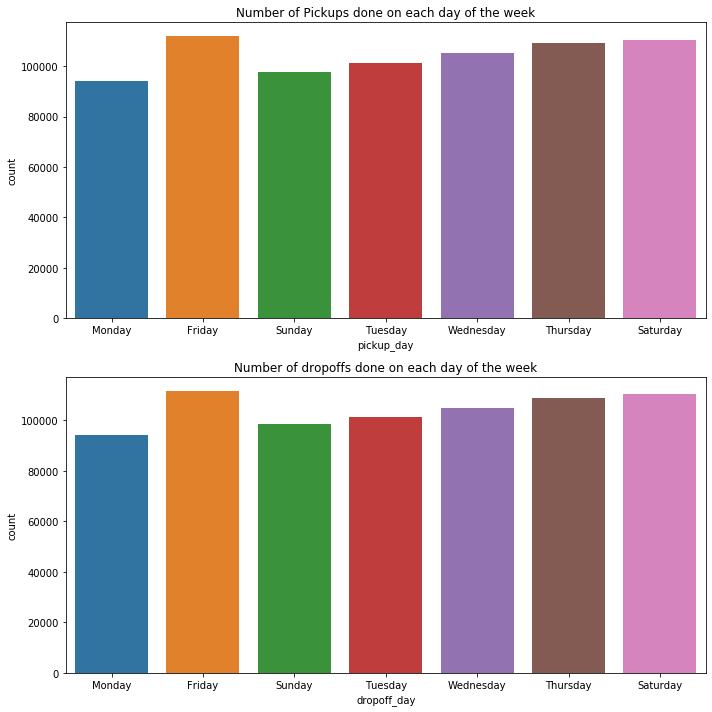

In [42]:
figure,ax=plt.subplots(nrows=2,ncols=1,figsize=(10,10))
sns.countplot(x='pickup_day',data=data,ax=ax[0])
ax[0].set_title('Number of Pickups done on each day of the week')
sns.countplot(x='dropoff_day',data=data,ax=ax[1])
ax[1].set_title('Number of dropoffs done on each day of the week')
plt.tight_layout()

### The distribution of Pickup and Drop Off hours of the day

- The time part is represented by hours,minutes and seconds which is difficult for the analysis thus we divide the times into 4 time zones: morning (4 hrs to 10 hrs) , midday (10 hrs to 16 hrs) , evening (16 hrs to 22 hrs) and late night (22 hrs to 4 hrs)

In [43]:
def timezone(x):
    if x>=datetime.time(4, 0, 1) and x <=datetime.time(10, 0, 0):
        return 'morning'
    elif x>=datetime.time(10, 0, 1) and x <=datetime.time(16, 0, 0):
        return 'midday'
    elif x>=datetime.time(16, 0, 1) and x <=datetime.time(22, 0, 0):
        return 'evening'
    elif x>=datetime.time(22, 0, 1) or x <=datetime.time(4, 0, 0):
        return 'late night'
    
data['pickup_timezone']=data['pickup_datetime'].apply(lambda x :timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )
data['dropoff_timezone']=data['dropoff_datetime'].apply(lambda x :timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )

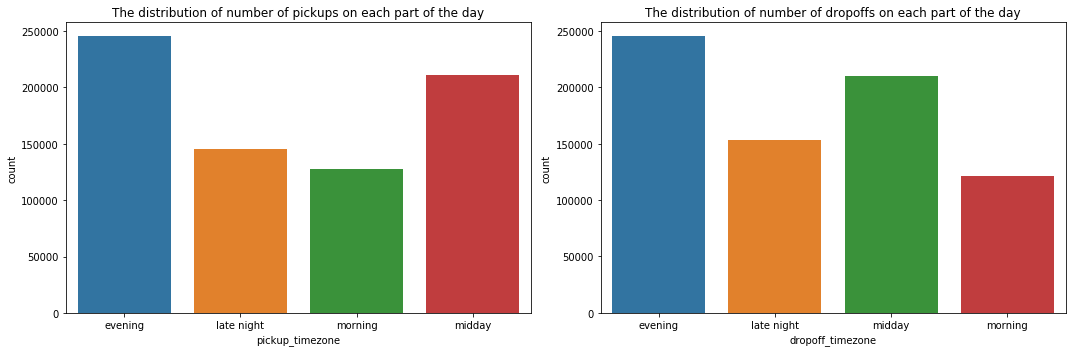

In [44]:
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
sns.countplot(x='pickup_timezone',data=data,ax=ax[0])
ax[0].set_title('The distribution of number of pickups on each part of the day')
sns.countplot(x='dropoff_timezone',data=data,ax=ax[1])
ax[1].set_title('The distribution of number of dropoffs on each part of the day')
plt.tight_layout()

<b>Thus we observe that most pickups and drops occur in the evening. While the least drops and pickups occur during morning.</b>

### Graphical distributions for pickup and dropoff in terms of hour of the day

Text(0.5, 1.0, 'Distribution of dropoff hours')

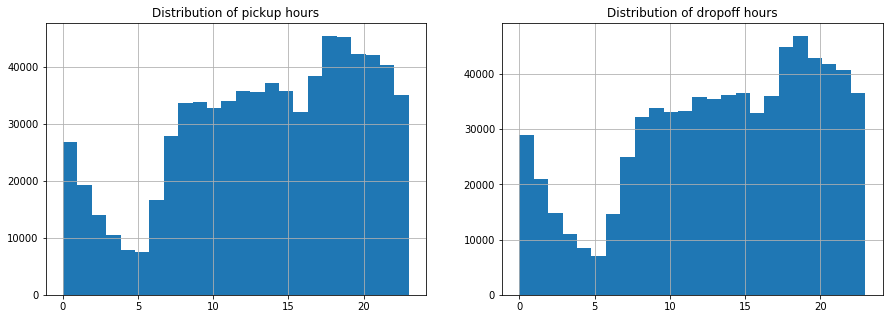

In [45]:
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
data['pickup_hour']=data['pickup_datetime'].dt.hour
data.pickup_hour.hist(bins=24,ax=ax[0])
ax[0].set_title('Distribution of pickup hours')
data['dropoff_hour']=data['dropoff_datetime'].dt.hour
data.dropoff_hour.hist(bins=24,ax=ax[1])
ax[1].set_title('Distribution of dropoff hours')

## Univariate: Missing Values

In [46]:
# finding number of missing values in every variable
data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
pickup_day            0
dropoff_day           0
pickup_timezone       0
dropoff_timezone      0
pickup_hour           0
dropoff_hour          0
dtype: int64

##### - We find there is no missing values in the dataset. wuhuuuuuuuuuuuuu

## Univariate Analysis: Outliers

**We suspected outliers in passenger count group. We will verify that using box plots**

In [47]:
# custom function for easy outlier analysis

def UVA_outlier(data, var_group, include_outlier = True):
  '''
  Univariate_Analysis_outlier:
  takes a group of variables (INTEGER and FLOAT) and plot/print boplot and descriptives\n
  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it \n\n

  data : dataframe from which to plot from\n
  var_group : {list} type Group of Continuous variables\n
  include_outlier : {bool} whether to include outliers or not, default = True\n
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = med-(1.5*IQR)
    whis_high = med+(1.5*IQR)

    # Calculating Number of Outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier == True:
      print(include_outlier)
      #Plotting the variable with every information
      plt.subplot(1,size,j+1)
      sns.boxplot(data[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('With Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))
      
    else:
      # replacing outliers with max/min whisker
      data2 = data[var_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1
      
      # plotting without outliers
      plt.subplot(1,size,j+1)
      sns.boxplot(data2[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

True


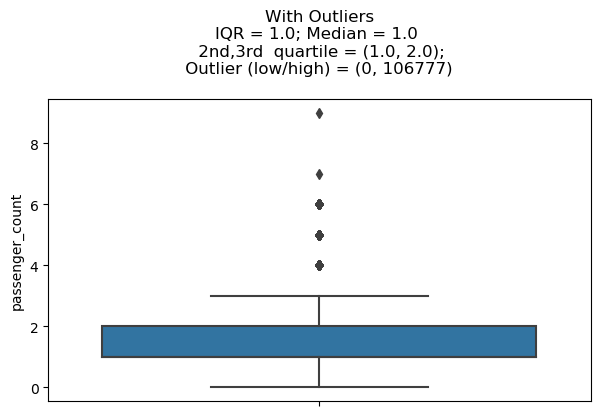

In [48]:
UVA_outlier(data, passenger_details,)

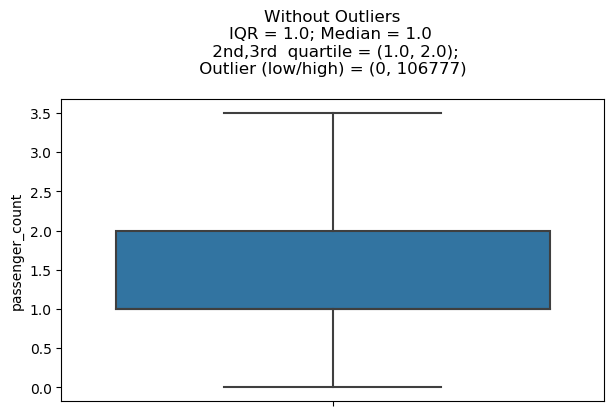

In [49]:
UVA_outlier(data, passenger_details, include_outlier=False)

## Bivariate Analysis : Numerical-Numerical

In [50]:
# isolating numerical datatypes
numerical = data.select_dtypes(include=['int64','float64','Int64'])[:]
numerical.dtypes

passenger_count        int64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
trip_duration          int64
pickup_hour            int64
dropoff_hour           int64
dtype: object

In [51]:
# calculating Pearson correlation
correlation = numerical.dropna().corr()
correlation

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_hour,dropoff_hour
passenger_count,1.000000,0.001163,-0.004696,-0.000027,-0.003944,0.013022,0.009851,0.009214
pickup_longitude,0.001163,1.000000,0.047635,0.780647,0.118473,0.035447,0.010754,0.011170
pickup_latitude,-0.004696,0.047635,1.000000,0.119970,0.479352,-0.038163,0.011433,0.018061
dropoff_longitude,-0.000027,0.780647,0.119970,1.000000,0.149598,0.020664,-0.022014,-0.023193
dropoff_latitude,-0.003944,0.118473,0.479352,0.149598,1.000000,-0.028283,0.014257,0.018173
trip_duration,0.013022,0.035447,-0.038163,0.020664,-0.028283,1.000000,0.002979,0.003027
pickup_hour,0.009851,0.010754,0.011433,-0.022014,0.014257,0.002979,1.000000,0.934591
dropoff_hour,0.009214,0.011170,0.018061,-0.023193,0.018173,0.003027,0.934591,1.000000


### Heatmap

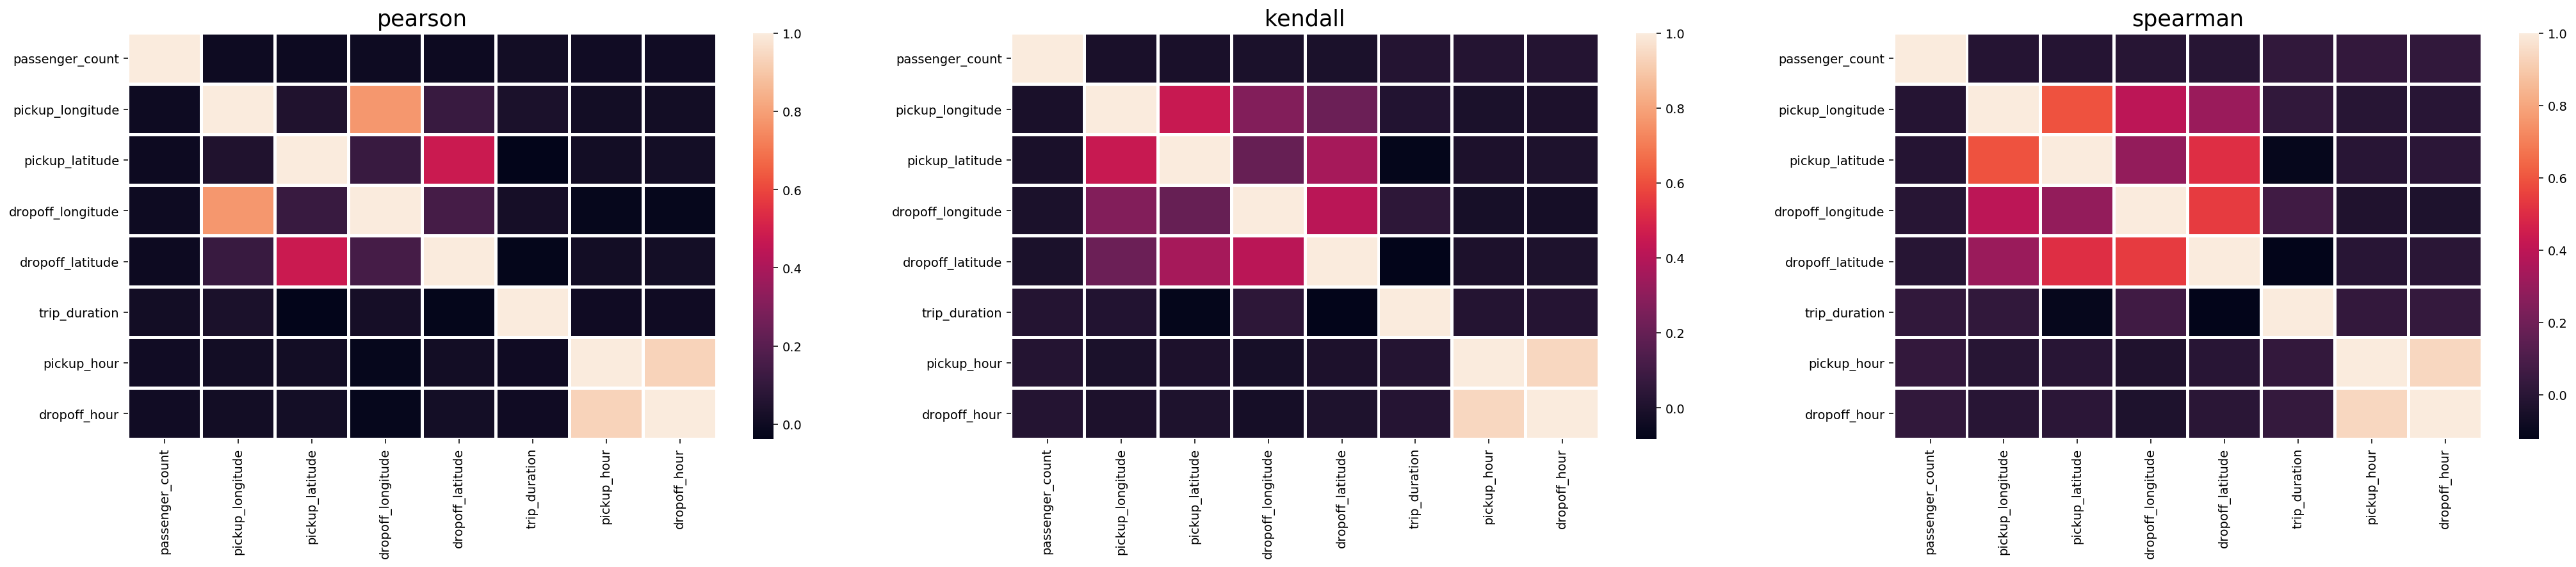

In [52]:
# plotting heatmap usill all methods for all numerical variables
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = numerical.dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=18)

* Kendall and Spearman correlation seem to have very similar pattern between them, except the slight variation in magnitude of correlation.
*  Too many variables with insignificant correlation.
*  Major correlation lies between the pickup details and dropoff details variables.

In [53]:
# Grouping variables
longitude_values = ['pickup_longitude','dropoff_longitude']
latitude_values = ['pickup_latitude','dropoff_latitude']

<Figure size 840x560 with 0 Axes>

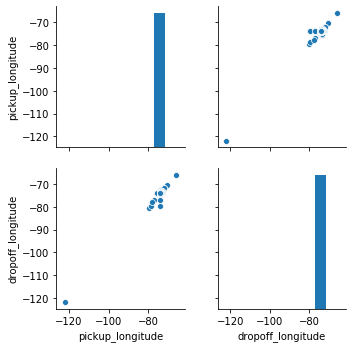

In [54]:
# scatter plot for longitude variable
plt.figure(dpi=140)
sns.pairplot(numerical[longitude_values]) 

<Figure size 840x560 with 0 Axes>

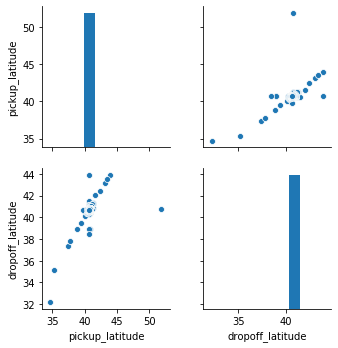

In [55]:
# scatter plot for longitude variable
plt.figure(dpi=140)
sns.pairplot(numerical[latitude_values])

**Inferences**
1.    This validates the high correlation between the longitude variables.
2.    Correlation between longitude variables is more strong as compared to latitude variables.

## Bivariate Analysis: Continuous-Categorical variables

- The relationship between vendor id and duration

In [56]:
def TwoSampZ(X1, X2, sigma1, sigma2, N1, N2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sampled Z-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import norm
  ovr_sigma = sqrt(sigma1**2/N1 + sigma2**2/N2)
  z = (X1 - X2)/ovr_sigma
  pval = 2*(1 - norm.cdf(abs(z)))
  return pval

In [57]:
def TwoSampT(X1, X2, sd1, sd2, n1, n2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sample T-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import t as t_dist
  ovr_sd = sqrt(sd1**2/n1 + sd2**2/n2)
  t = (X1 - X2)/ovr_sd
  df = n1+n2-2
  pval = 2*(1 - t_dist.cdf(abs(t),df))
  return pval

In [58]:
def Bivariate_cont_cat(data, cont, cat, category):
  #creating 2 samples
  x1 = data[cont][data[cat]==category][:]
  x2 = data[cont][~(data[cat]==category)][:]
  
  #calculating descriptives
  n1, n2 = x1.shape[0], x2.shape[0]
  m1, m2 = x1.mean(), x2.mean()
  std1, std2 = x1.std(), x2.mean()
  
  #calculating p-values
  t_p_val = TwoSampT(m1, m2, std1, std2, n1, n2)
  z_p_val = TwoSampZ(m1, m2, std1, std2, n1, n2)

  #table
  table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)

  #plotting
  plt.figure(figsize = (15,6), dpi=140)
  
  #barplot
  plt.subplot(1,2,1)
  sns.barplot([str(category),'not {}'.format(category)], [m1, m2])
  plt.ylabel('mean {}'.format(cont))
  plt.xlabel(cat)
  plt.title('t-test p-value = {} \n z-test p-value = {}\n {}'.format(t_p_val,
                                                                z_p_val,
                                                                table))

  # boxplot
  plt.subplot(1,2,2)
  sns.boxplot(x=cat, y=cont, data=data)
  plt.title('categorical boxplot')

### 1. The relationship between vendor id and duration

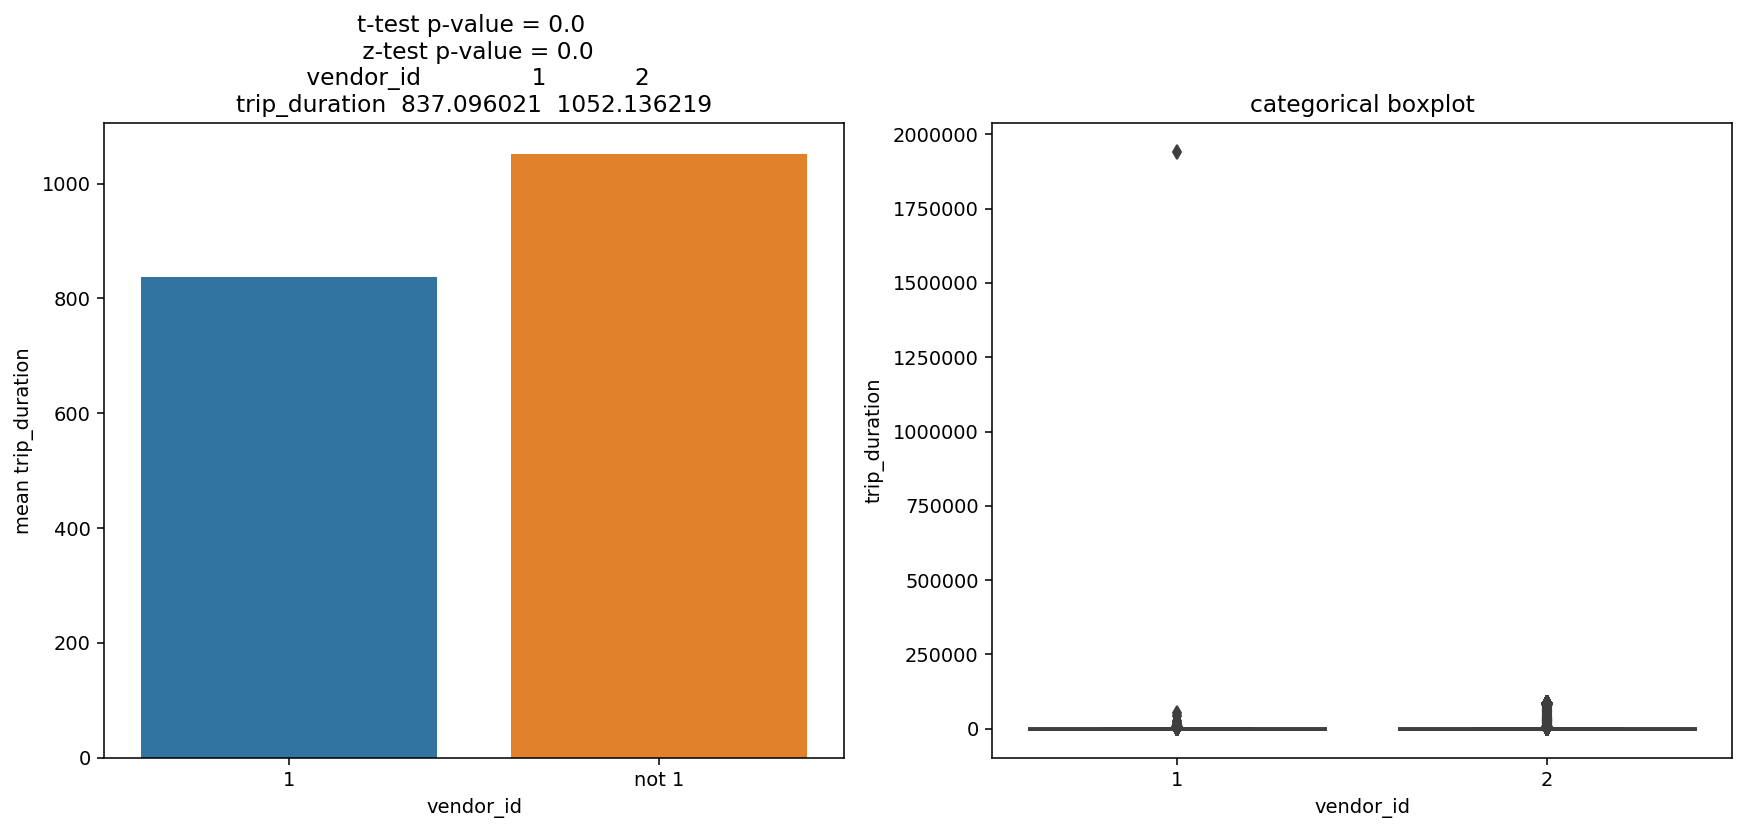

In [59]:
Bivariate_cont_cat(data, 'trip_duration', 'vendor_id', 1)

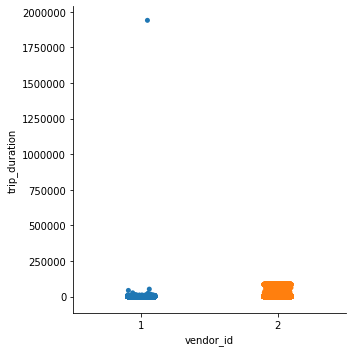

In [60]:
sns.catplot(x="vendor_id", y="trip_duration",kind="strip",data=data)

- vendor 2 mostly provides short trip duration cabs while vendor 1 provides cab for both short and long trips.

### 2. The relationship between store forward flag and duration

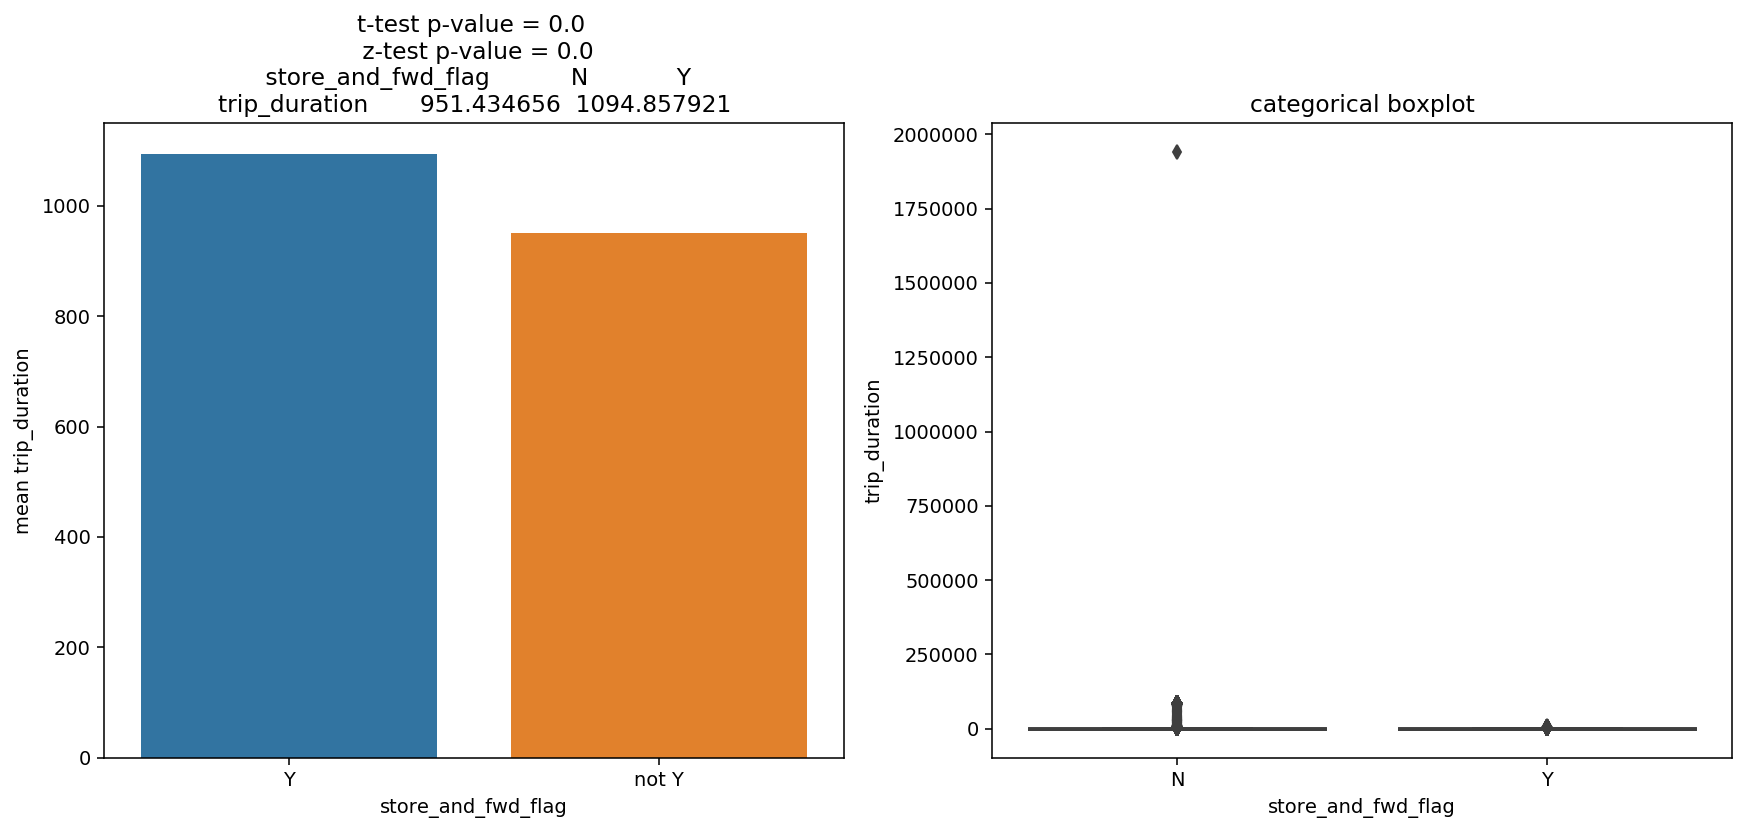

In [61]:
Bivariate_cont_cat(data, 'trip_duration', 'store_and_fwd_flag', 'Y')

- we see the flag was stored only for short duration trips and for long duration trips the flag was never stored.

In [62]:
data.dtypes

id                          category
vendor_id                   category
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag          category
trip_duration                  int64
pickup_day                    object
dropoff_day                   object
pickup_timezone               object
dropoff_timezone              object
pickup_hour                    int64
dropoff_hour                   int64
dtype: object

In [63]:
data['trip_duration'].mean()

952.2291333594764

### 3. The relationship between pickup day, dropoff day and duration

In [64]:
# typecasting "pickup_day" to category type.
data['pickup_day'] = data['pickup_day'].astype('category')
# checking
data[['pickup_day']].dtypes

pickup_day    category
dtype: object

In [65]:
data['pickup_day'].head()

0       Monday
1       Friday
2       Sunday
3      Tuesday
4    Wednesday
Name: pickup_day, dtype: category
Categories (7, object): [Friday, Monday, Saturday, Sunday, Thursday, Tuesday, Wednesday]

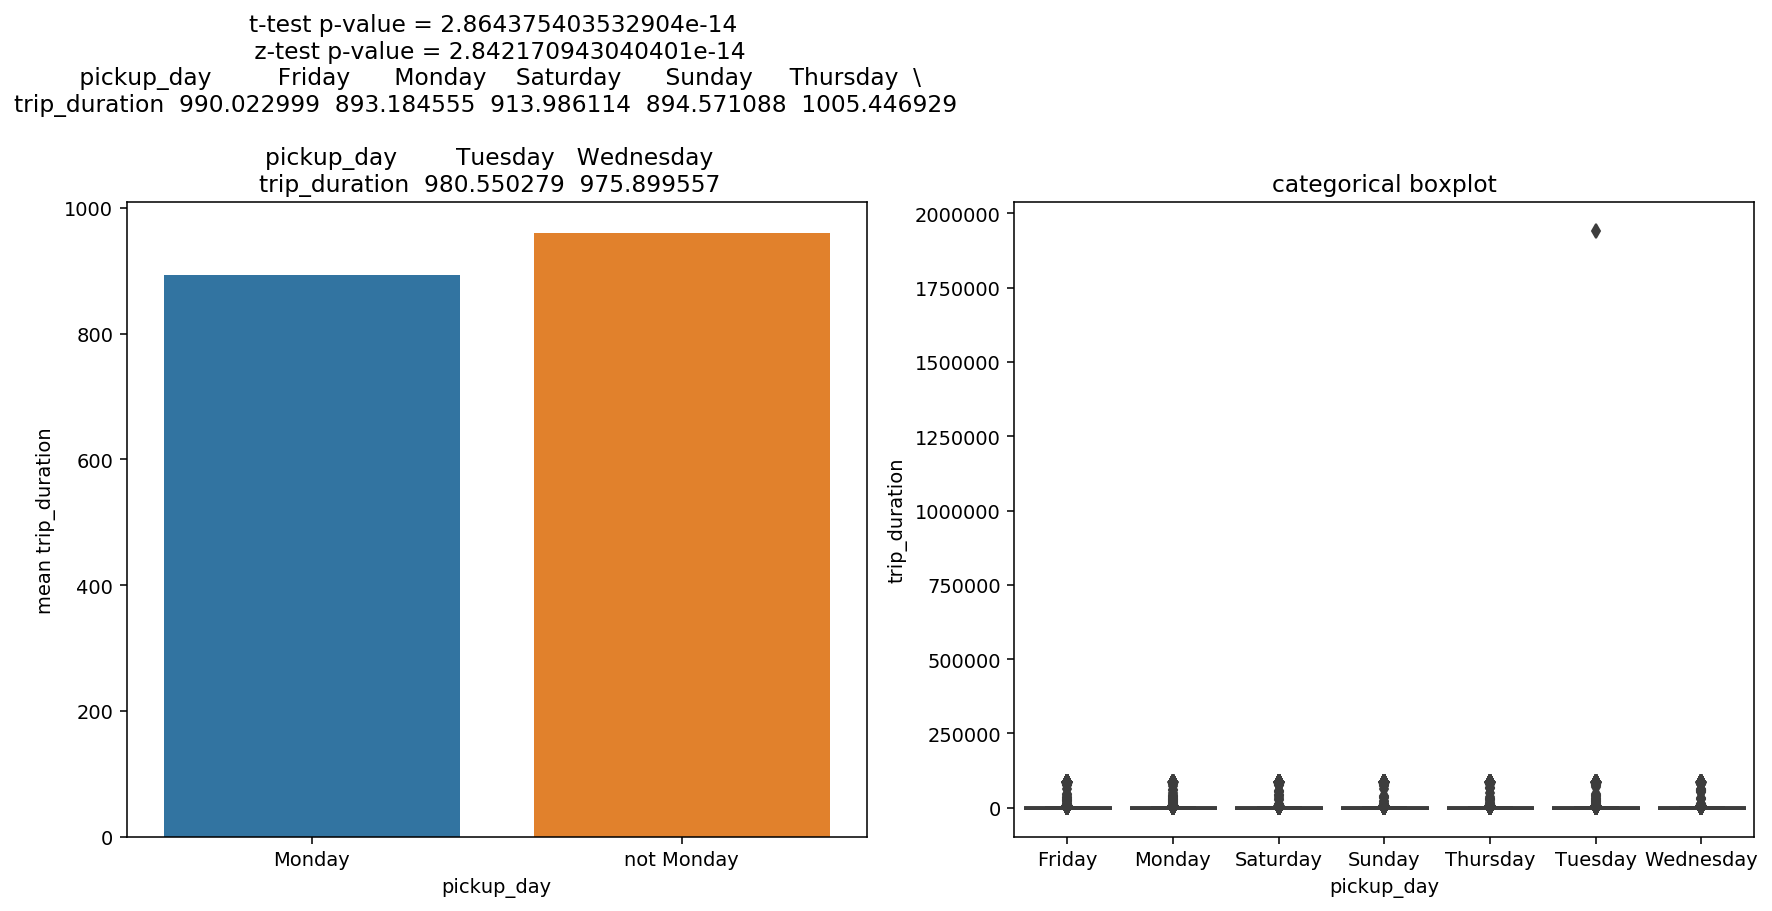

In [66]:
Bivariate_cont_cat(data, 'trip_duration', 'pickup_day', 'Monday')

- Highest trip duration gets covered on Tuesday as we can infer from the graph.

Text(0.5, 1, 'The Average Trip Duration per PickUp Day of the week')

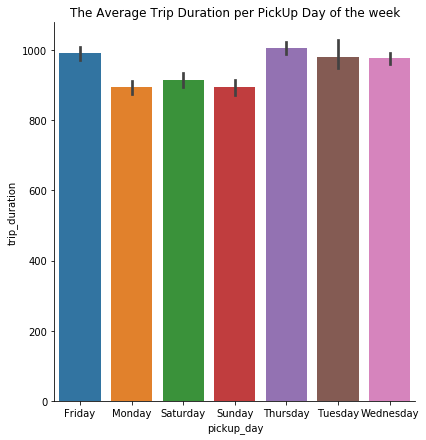

In [67]:
sns.catplot(x="pickup_day",y="trip_duration",kind="bar",data=data,height=6,aspect=1)
plt.title('The Average Trip Duration per PickUp Day of the week')

- The highest avg time taken to complete a trip when pick up day is Thursday.

Text(0.5, 1, 'The Average Trip Duration per Dropoff Day of the week')

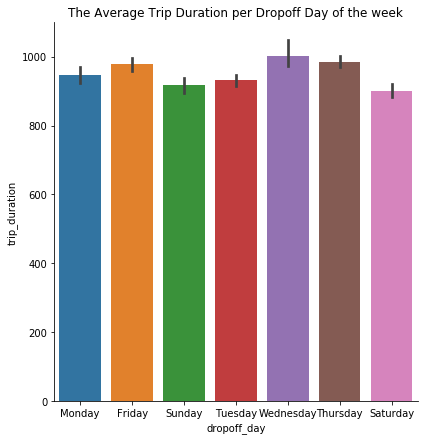

In [68]:
sns.catplot(x="dropoff_day",y="trip_duration",kind="bar",data=data,height=6,aspect=1)
plt.title('The Average Trip Duration per Dropoff Day of the week')

- The highest avg time taken to complete a trip when dropoff day is Wednesday.

## Bivariate : Categorical-Categorical

In [69]:
data.dtypes

id                          category
vendor_id                   category
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag          category
trip_duration                  int64
pickup_day                  category
dropoff_day                   object
pickup_timezone               object
dropoff_timezone              object
pickup_hour                    int64
dropoff_hour                   int64
dtype: object

### 1. The relationship between vendor id and store and fwd flag

In [70]:
def BVA_categorical_plot(data, tar, cat):
  '''
  take data and two categorical variables,
  calculates the chi2 significance between the two variables 
  and prints the result with countplot & CrossTab
  '''
  #isolating the variables
  data = data[[cat,tar]][:]

  #forming a crosstab
  table = pd.crosstab(data[tar],data[cat],)
  f_obs = np.array([table.iloc[0][:].values,
                    table.iloc[1][:].values])

  #performing chi2 test
  from scipy.stats import chi2_contingency
  chi, p, dof, expected = chi2_contingency(f_obs)
  
  #checking whether results are significant
  if p<0.05:
    sig = True
  else:
    sig = False

  #plotting grouped plot
  sns.countplot(x=cat, hue=tar, data=data)
  plt.title("p-value = {}\n difference significant? = {}\n".format(round(p,8),sig))

  #plotting percent stacked bar plot
  #sns.catplot(ax, kind='stacked')
  ax1 = data.groupby(cat)[tar].value_counts(normalize=True).unstack()
  ax1.plot(kind='bar', stacked='True',title=str(ax1))
  int_level = data[cat].value_counts()

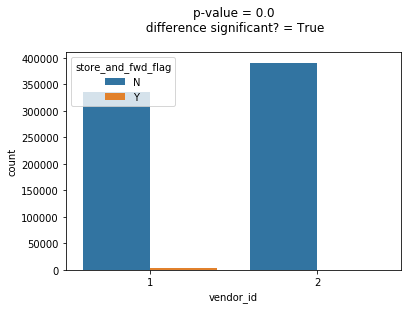

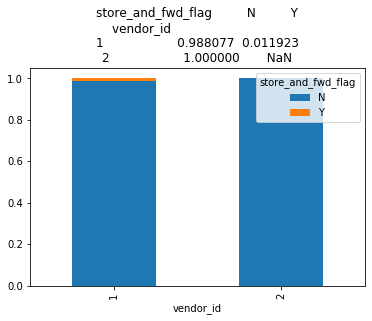

In [71]:
BVA_categorical_plot(data, 'store_and_fwd_flag', 'vendor_id')

###### Result
- We can infer from the graph that vendor 2 provides the cab which is mostly connected to the server.